In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
df=pd.read_csv("E:\data\hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [109]:
df.shape

(119390, 32)

In [110]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [111]:
#zero imputation 
def data_clean(df):
    df.fillna(0,inplace=True)
    print(df.isna().sum())

In [112]:
data_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [113]:
#removing logical error

#finding uniques values using dictionary

#dic={'adults':df['adults'].unique(),'children':df['children'].unique(),'babies':df['babies'].unique()}
#for col,values in dic.items():
#   print(f'uniques values of {col}:{values}')

In [114]:
#finding unique values using list
uniq_list=["adults","children","babies"]
for i in df[uniq_list]:
    print(f'uniques values of {df[i].unique()}')

uniques values of [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
uniques values of [ 0.  1.  2. 10.  3.]
uniques values of [ 0  1  2 10  9]


In [115]:
filtered_data=(df["adults"]==0)&(df["children"]==0)&(df["babies"]==0)
new_df=df[~filtered_data] #negation ie select the rows that do not satisfy the condition mentioned above 
new_df.shape

(119210, 32)

<h2>EDA

<h2> Spatial analytics </h2>

In [116]:
#we will be only taking those data into consideration where booking has not been canceled. So 
conf_booking=new_df['is_canceled']==0

country_wise_data=new_df[conf_booking]["country"].value_counts().reset_index()
country_wise_data.columns=["Country","No of guests"]
country_wise_data

,Country,No of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,MLI,1
162,MMR,1
163,NCL,1
164,BHS,1


In [117]:
import plotly.express as px


In [118]:
map_visual=px.choropleth(country_wise_data,locations=country_wise_data['Country'],
                         color=country_wise_data['No of guests'],
                        hover_name=country_wise_data['Country'],
                        title="Home country of guests")
map_visual

<h2> Analysis of how much do guest pay/night </h2>

In [119]:
new_df["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [120]:
data=new_df[conf_booking]
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


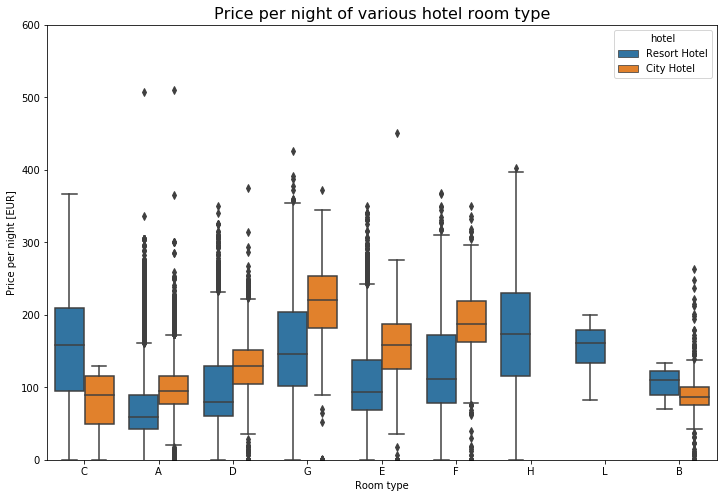

In [121]:
plt.figure(figsize=(12,8))
sns.boxplot(x="reserved_room_type",
           y="adr",
           hue="hotel",
           data=data)
plt.title("Price per night of various hotel room type", fontsize=16)
plt.xlabel("Room type")
plt.ylabel("Price per night [EUR]")
plt.ylim(0,600)
plt.show()


<h2> Variation of price per night (adr) yearly </h2>


In [122]:
new_df["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [123]:
resort_hotel_data=new_df[(conf_booking) &(new_df['hotel']=="Resort Hotel")]
city_hotel_data=new_df[(conf_booking)&(new_df['hotel']=="City Hotel")]

In [124]:
resort_hotel=resort_hotel_data.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=city_hotel_data.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [125]:
final=resort_hotel.merge(city_hotel,on="arrival_date_month")
final.columns=("Month","Resort_Hotel_Rate","City_Hotel_Rate")
final

,Month,Resort_Hotel_Rate,City_Hotel_Rate
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


<h2>Sorting the months in the final dataset </h2>

In [126]:
from calendar import month_name
def sort_month(df,colname):
    month_dic={j:i for i,j in enumerate(month_name)}
    df["month_num"]=df[colname].apply(lambda x: month_dic[x])
    return df.sort_values("month_num").reset_index().drop(['index','month_num'], axis = 1)

In [127]:
sort_month(final, "Month")

,Month,Resort_Hotel_Rate,City_Hotel_Rate
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


Text(0, 0.5, 'Rate')

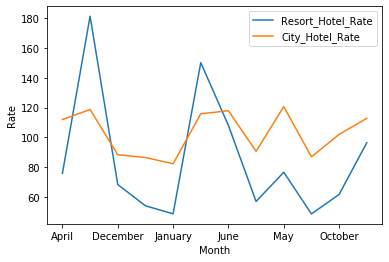

In [128]:
final.plot(kind="line",x="Month",y=["Resort_Hotel_Rate","City_Hotel_Rate"])
plt.ylabel("Rate")

<h2> Finding month with highest number of guests</h2>


In [129]:
rush_resort=new_df[(conf_booking)&(new_df['hotel']=="Resort Hotel")]

In [130]:
highest_rush_resort=rush_resort['arrival_date_month'].value_counts().reset_index()
highest_rush_resort.columns=("Month","No of guests in Resort_hotel")
highest_rush_resort

,Month,No of guests in Resort_hotel
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [131]:
rush_city=new_df[(conf_booking)&(new_df['hotel']=='City Hotel')]

In [132]:
highest_rush_city=rush_city['arrival_date_month'].value_counts().reset_index()
highest_rush_city.columns=("Month","No of guests in City_hotel")
highest_rush_city

,Month,No of guests in City_hotel
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [133]:
final_rush=highest_rush_resort.merge(highest_rush_city, on ="Month")
final_rush

,Month,No of guests in Resort_hotel,No of guests in City_hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [134]:
rush_visual=sort_month(final_rush,"Month")

Text(0, 0.5, 'Guest_count')

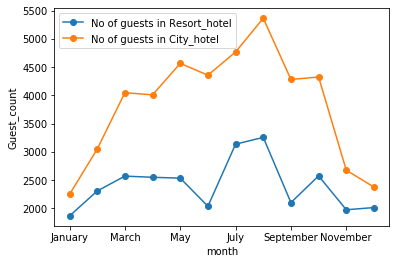

In [135]:
rush_visual.plot(kind="line",x="Month",y=["No of guests in Resort_hotel","No of guests in City_hotel"],marker="o")
plt.xlabel("month")
plt.ylabel("Guest_count")


<h2> How long do ppl stay at hotels</h2>

In [136]:
clean_data = new_df[conf_booking]


In [137]:
clean_data["total_nights"]=new_df["stays_in_week_nights"]+new_df["stays_in_weekend_nights"]

In [138]:
stay = clean_data.groupby(["total_nights", "hotel"]).agg('count').reset_index()
stay.iloc[:,0:3].head(10)

,total_nights,hotel,is_canceled
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983
5,2,Resort Hotel,4488
6,3,City Hotel,11889
7,3,Resort Hotel,3828
8,4,City Hotel,7694
9,4,Resort Hotel,3321


In [139]:
stay = stay.rename(columns = {'is_canceled': 'Number of stays','hotel':'Hotel','total_nights':'Total no of nights'})
stay.iloc[:,0:3]

,Total no of nights,Hotel,Number of stays
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


In [140]:
#plot the chart

px.bar(data_frame = stay, x = 'Total no of nights', y = 'Number of stays', color = 'Hotel', barmode = 'group')


<H2>DATA PRE PROCESSING

<h3> Selecting important numerical features using co-relation

In [141]:
correlation = new_df.corr()

In [142]:
correlation = correlation["is_canceled"][1:]

In [143]:
correlation.abs().sort_values(ascending = False)

lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [144]:
list_not = ["days_in_waiting_list", "arrival_date_year"]

In [145]:
num_features = [col for col in new_df.columns if new_df[col].dtype != "O" and col not in list_not] 

In [146]:
print(num_features)

['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


<h2>Selecting important Categorical features </h2>

In [147]:
new_df["reservation_status"].value_counts()

Check-Out    75011
Canceled     42993
No-Show       1206
Name: reservation_status, dtype: int64

In [148]:
new_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [149]:
cat_not = ["country", "reservation_status", "booking_changes", "assigned_room_type", "days_in_waiting_list" ]

In [150]:
cat_features = [col for col in new_df.columns 
                if new_df[col].dtype == "O" and col not in cat_not]

In [151]:
print(cat_features)

['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'reservation_status_date']


In [152]:
print(num_features)

['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [153]:
data_cat = new_df[cat_features]

In [154]:
print(data_cat.head())

          hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type reservation_status_date  
0                  C   No Deposit     Transient                7/1/2015  
1                  C   No Deposit     Transient                7/1/2015  
2                  A   No Deposit     Transient                7/2/2015  
3                  A   No Deposit     Transient                7/2/2015  
4                  A   No Deposit     Transient                7/3/2015  


In [155]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

data_cat["reservation_status_date"] = pd.to_datetime(data_cat["reservation_status_date"])


In [156]:
data_cat["year"] = data_cat["reservation_status_date"].dt.year

data_cat["month"] = data_cat["reservation_status_date"].dt.month

data_cat["day"] = data_cat["reservation_status_date"].dt.day

In [157]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,year,month,day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03,2015,7,3


In [158]:
data_cat.drop("reservation_status_date", axis = 1, inplace = True)

In [159]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


<h2> Mean Encoding </h2

In [160]:
data_cat.columns

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day'],
      dtype='object')

In [161]:
data_cat["cancellation"] = new_df["is_canceled"]

In [162]:
def mean_encode(df, col, mean_col):
    df_dict = df.groupby([col])[mean_col].mean().to_dict()
    df[col] = df[col].map(df_dict)
    return df

for col in data_cat.columns[0:8]:
    data_cat = mean_encode(data_cat, col, "cancellation")



In [163]:
data_cat.drop(["cancellation"], axis = 1, inplace = True)

In [164]:
print(data_cat)

           hotel  arrival_date_month      meal  market_segment  \
0       0.277674            0.374644  0.374106        0.153712   
1       0.277674            0.374644  0.374106        0.153712   
2       0.277674            0.374644  0.374106        0.153712   
3       0.277674            0.374644  0.374106        0.187618   
4       0.277674            0.374644  0.374106        0.367590   
...          ...                 ...       ...             ...   
119385  0.417859            0.377823  0.374106        0.343313   
119386  0.417859            0.377823  0.374106        0.367590   
119387  0.417859            0.377823  0.374106        0.367590   
119388  0.417859            0.377823  0.374106        0.367590   
119389  0.417859            0.377823  0.344653        0.367590   

        distribution_channel  reserved_room_type  deposit_type  customer_type  \
0                   0.174868            0.330827       0.28402       0.407864   
1                   0.174868            0.330

<h2>Preparing the data

In [165]:
num_data = new_df[num_features] #numerical data

cat_data = data_cat #categorical data


dataframe = pd.concat([num_data, cat_data], axis = 1) #final dataframe


In [166]:
print(dataframe.head())

   is_canceled  lead_time  arrival_date_week_number  \
0            0        342                        27   
1            0        737                        27   
2            0          7                        27   
3            0         13                        27   
4            0         14                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  is_repeated_guest  ...  arrival_date_month  \
0       2       0.0       0                  0  ...            0.374644   
1       2       0.0       0                 

<h2> Handling the outliers

In [167]:
dataframe.describe()["adr"]

count    119210.000000
mean        101.969092
std          50.434007
min          -6.380000
25%          69.500000
50%          94.950000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

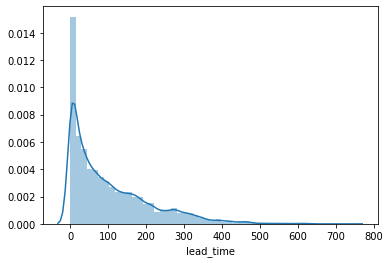

In [168]:
#using seaborn library
sns.distplot(dataframe["lead_time"])

In [169]:
def handle_outlier(col):
    dataframe[col] = np.log1p(dataframe[col])

In [170]:
handle_outlier("lead_time")

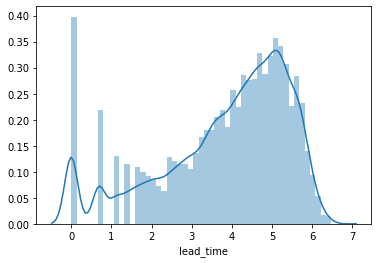

In [171]:
sns.distplot(dataframe["lead_time"].dropna())

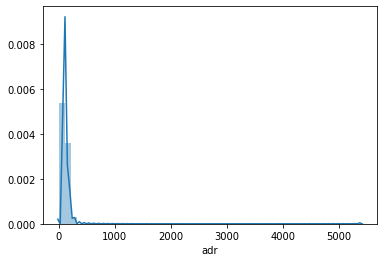

In [172]:
sns.distplot(dataframe["adr"])

In [173]:
handle_outlier("adr")

In [174]:
dataframe.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                       

In [175]:
dataframe.dropna(inplace = True)

<h2>Feature Importance

In [176]:
y = dataframe["is_canceled"] #dependent variable

X = dataframe.drop("is_canceled", axis = 1) #independent



In [177]:
X.columns

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day'],
      dtype='object')

In [178]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [179]:
feature_sel_model = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))

In [180]:
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [181]:
feature_sel_model.get_support()

array([ True,  True, False, False, False,  True,  True, False, False,
        True, False,  True, False,  True,  True,  True,  True, False,
       False, False, False, False, False,  True, False,  True,  True,
        True])

In [182]:
cols = X.columns
print(cols)

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day'],
      dtype='object')


In [183]:
selected_feature = cols[(feature_sel_model.get_support())]

In [184]:
print(selected_feature)

Index(['lead_time', 'arrival_date_week_number', 'adults', 'children',
       'previous_cancellations', 'booking_changes', 'company', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'deposit_type', 'year', 'month', 'day'],
      dtype='object')


In [185]:
print(f"Total features {X.shape[1]}")

Total features 28


In [186]:
print(f"Selected features {len(selected_feature)}")

Selected features 14


In [187]:
X.columns

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day'],
      dtype='object')

In [188]:
X = X[selected_feature]

In [189]:
X.columns

Index(['lead_time', 'arrival_date_week_number', 'adults', 'children',
       'previous_cancellations', 'booking_changes', 'company', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'deposit_type', 'year', 'month', 'day'],
      dtype='object')

In [190]:
X.head()

,lead_time,arrival_date_week_number,adults,children,previous_cancellations,booking_changes,company,adr,required_car_parking_spaces,total_of_special_requests,deposit_type,year,month,day
0,5.837730,27,2,0.0,0,3,0.0,0.000000,0,0,0.28402,2015,7,1
1,6.603944,27,2,0.0,0,4,0.0,0.000000,0,0,0.28402,2015,7,1
2,2.079442,27,1,0.0,0,0,0.0,4.330733,0,0,0.28402,2015,7,2
3,2.639057,27,1,0.0,0,0,0.0,4.330733,0,0,0.28402,2015,7,2
4,2.708050,27,2,0.0,0,0,0.0,4.595120,0,1,0.28402,2015,7,3


In [191]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

# Splitting the data and model building

In [192]:
# X -> independent variables

# y -> dependent variable

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 45)

<h3>Model building

#  Logistic regression

In [193]:
from sklearn.linear_model import LogisticRegression

In [194]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train) #training of the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [195]:
y_pred = logistic_model.predict(x_test) #prediction by model

In [196]:
from sklearn.metrics import confusion_matrix

In [197]:
confusion_matrix(y_test, y_pred)

array([[16362,  2320],
       [ 5329,  5792]], dtype=int64)

In [198]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7433479851021709

<h2>Implementing:
    Logistic regression , Naive Bayes, Random Forest, Decision Tree & KNN

In [199]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [200]:
models = []

models.append(("Naive Bayes", GaussianNB()))
models.append(("Random Forest", RandomForestClassifier()))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("KNN", KNeighborsClassifier(n_neighbors = 5)))

In [201]:
for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    
    #make a predictions
    predictions = model.predict(x_test)
    
    #evaluate a model
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))
    
    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions, y_test))
    
    print("\n")
    

Naive Bayes
[[8820 1289]
 [9862 9832]]
0.6258430359359796


Random Forest
[[18546  1227]
 [  136  9894]]
0.9542663490252659


Decision Tree
[[17863   805]
 [  819 10316]]
0.9455088413918062


KNN
[[18522  1417]
 [  160  9704]]
0.9470858638392108


